# Exploratory Data Analysis: Stress Levels & Weather with Exams
This notebook performs exploratory data analysis (EDA) on stress level data linked with weather and exam conditions. We include:
- Summary statistics
- Feature engineering
- Visualizations (matplotlib, seaborn, plotly)
- Exam day overlays
- Moving averages

In [89]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import plotly.express as px
import os

# Plot styling
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [90]:
# Loading Dataset
file_path = 'StressLevels_Weather_Data_WithExams_Last.xlsx'  # Ensure this file is in your working directory
if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found: {file_path}")

df = pd.read_excel(file_path)

In [91]:
# Feature Engineering
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Weekday'] = df['Date'].dt.day_name()
df['Is_Weekend'] = df['Weekday'].isin(['Saturday', 'Sunday'])


In [92]:
# Basic Statistics and Dataset Information
print(df.info())
print(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               148 non-null    datetime64[ns]
 1   Day of Week        148 non-null    object        
 2   Time of Day        148 non-null    object        
 3   Time               148 non-null    object        
 4   Temperature (°C)   148 non-null    int64         
 5   Weather Condition  148 non-null    object        
 6   Stress Level       148 non-null    int64         
 7   Day                148 non-null    int32         
 8   Month              148 non-null    int32         
 9   Weekday            148 non-null    object        
 10  Is_Weekend         148 non-null    bool          
dtypes: bool(1), datetime64[ns](1), int32(2), int64(2), object(5)
memory usage: 10.7+ KB
None
                       Date Day of Week Time of Day   Time  Temperature (°C)  \
count 

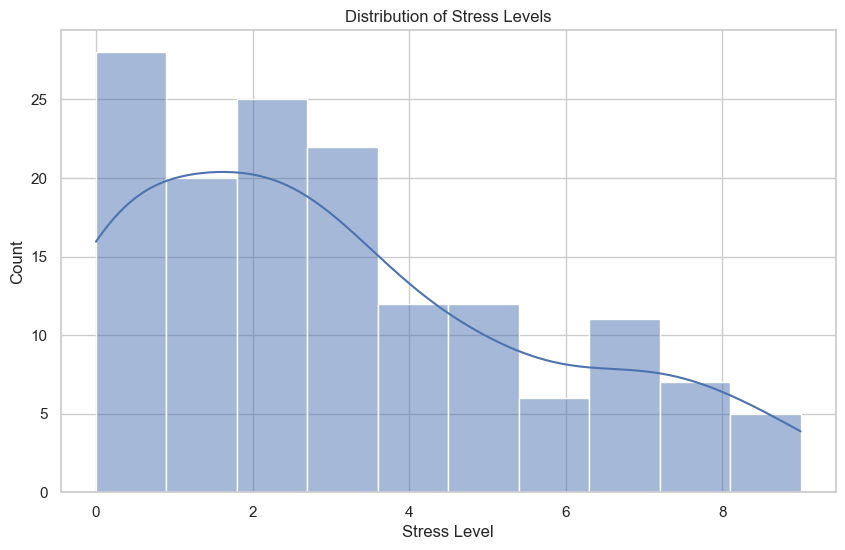

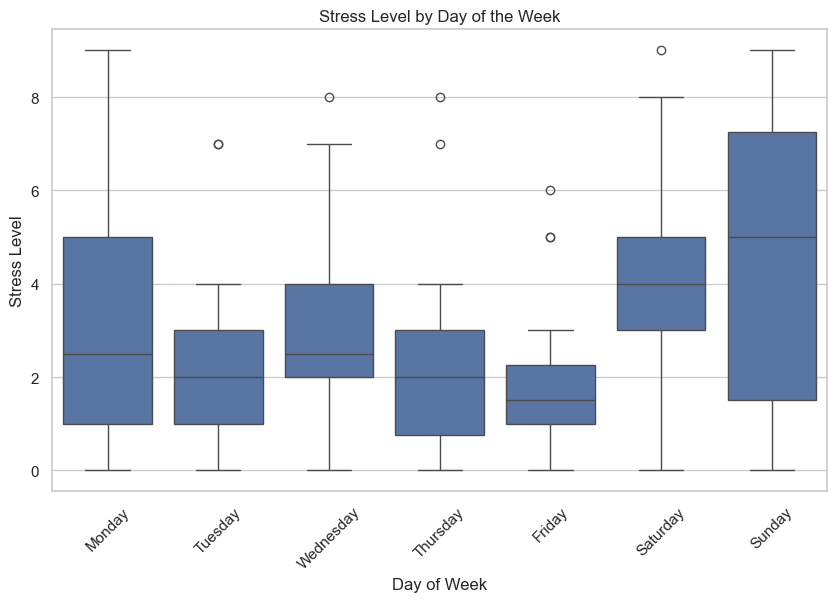

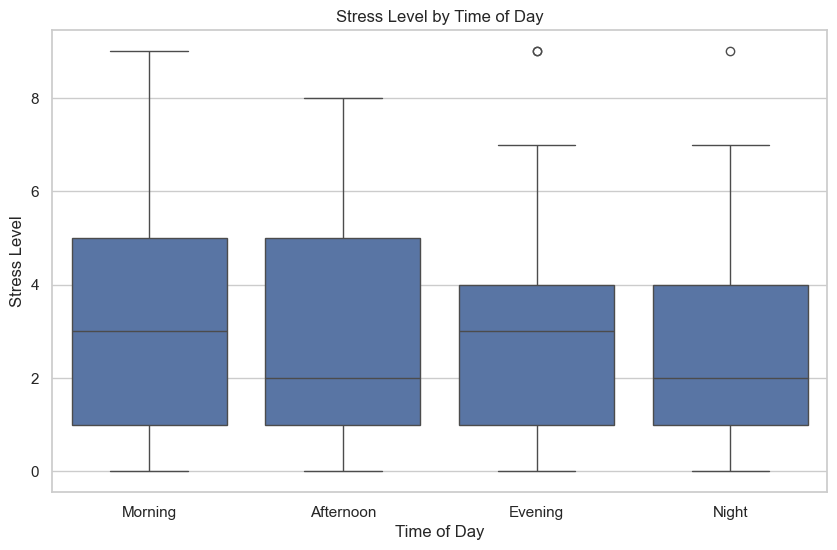

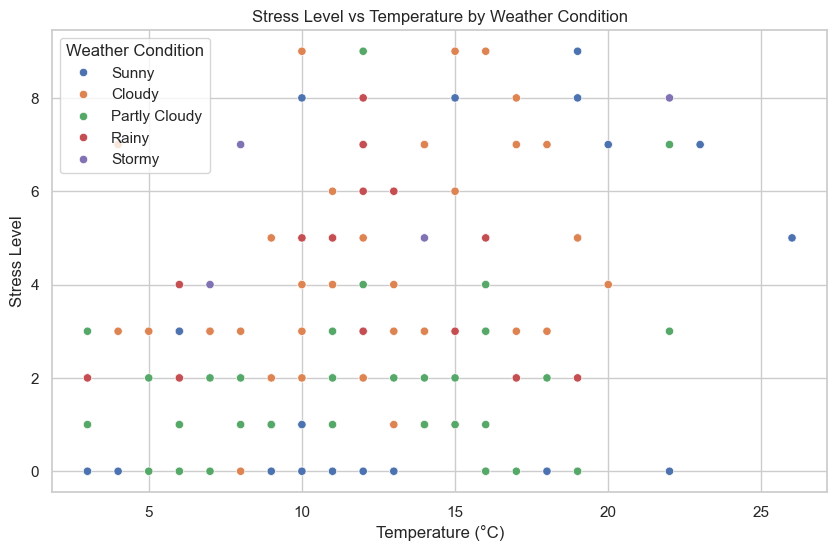

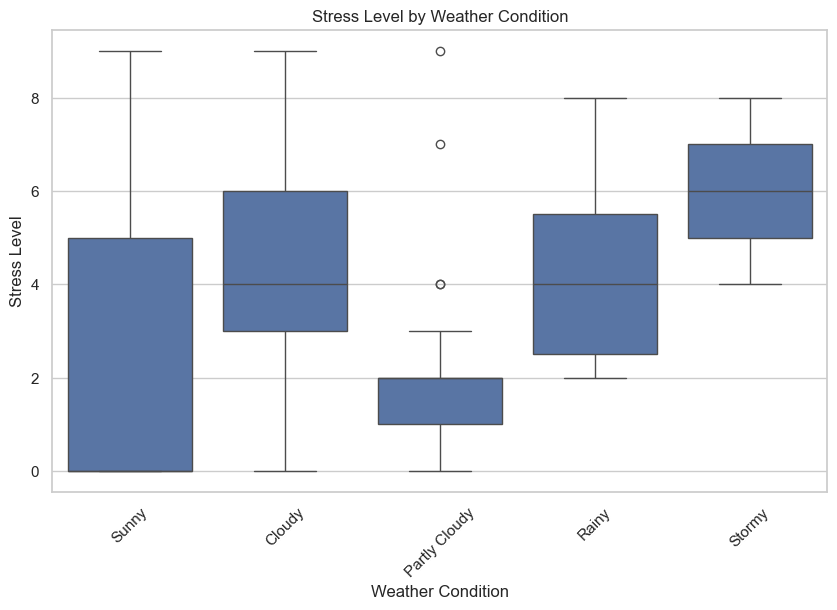

In [93]:
# Stress Level Distribution
sns.histplot(df['Stress Level'], kde=True, bins=10)
plt.title('Distribution of Stress Levels')
plt.show()

# Stress Level by Day of the Week
sns.boxplot(x='Day of Week', y='Stress Level', data=df, order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Stress Level by Day of the Week')
plt.xticks(rotation=45)
plt.show()

# Stress Level by Time of Day
sns.boxplot(x='Time of Day', y='Stress Level', data=df, order=[
    'Morning', 'Afternoon', 'Evening', 'Night'])
plt.title('Stress Level by Time of Day')
plt.show()

# Stress vs Temperature by Weather Temperature
sns.scatterplot(x='Temperature (°C)', y='Stress Level', hue='Weather Condition', data=df)
plt.title('Stress Level vs Temperature by Weather Condition')
plt.show()

# Stress by Weather Condition
sns.boxplot(x='Weather Condition', y='Stress Level', data=df)
plt.title('Stress Level by Weather Condition')
plt.xticks(rotation=45)
plt.show()

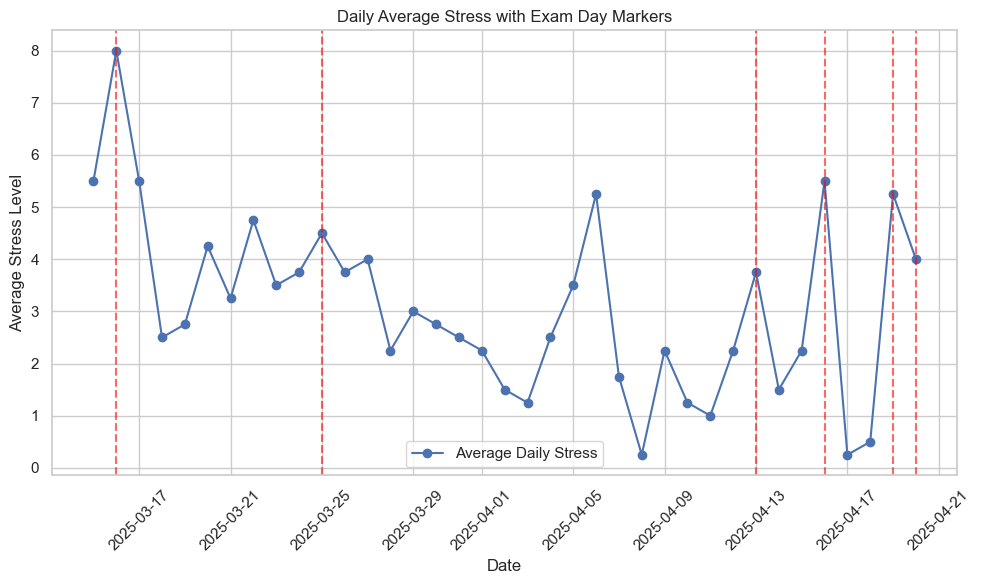

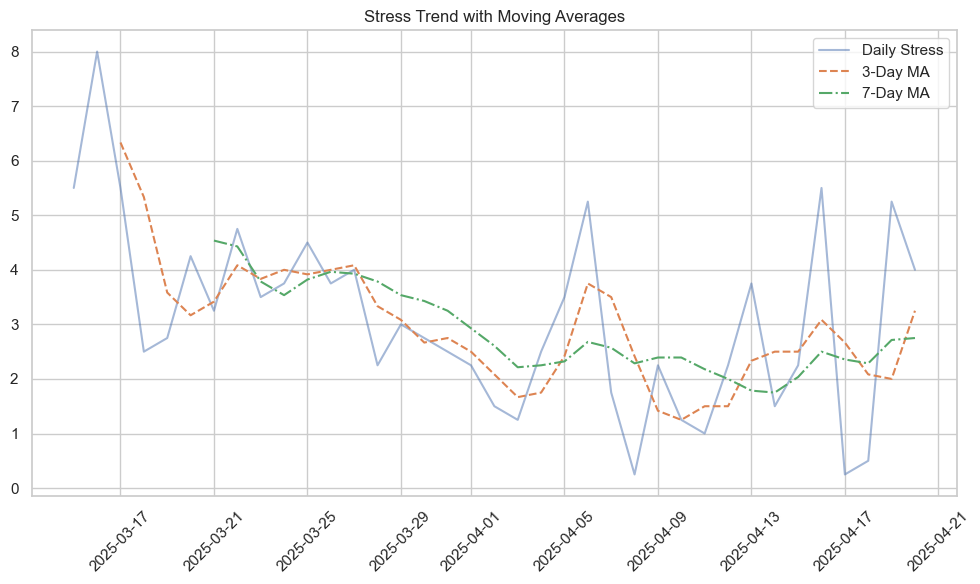

In [94]:
# Exam Dates
exam_dates = [
    datetime(2025, 3, 16), datetime(2025, 3, 25),
    datetime(2025, 4, 13), datetime(2025, 4, 16),
    datetime(2025, 4, 19), datetime(2025, 4, 20)
]

# Daily Average Stress
daily_stress = df.groupby('Date')['Stress Level'].mean()

# Stress with Exam Markers
plt.plot(daily_stress.index, daily_stress.values, marker='o', label='Average Daily Stress')
for date in exam_dates:
    plt.axvline(date, color='red', linestyle='--', alpha=0.6)
plt.title('Daily Average Stress with Exam Day Markers')
plt.xlabel('Date')
plt.ylabel('Average Stress Level')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Moving Averages
daily_stress_ma3 = daily_stress.rolling(window=3).mean()
daily_stress_ma7 = daily_stress.rolling(window=7).mean()

plt.plot(daily_stress, label='Daily Stress', alpha=0.5)
plt.plot(daily_stress_ma3, label='3-Day MA', linestyle='--')
plt.plot(daily_stress_ma7, label='7-Day MA', linestyle='-.')
plt.title('Stress Trend with Moving Averages')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

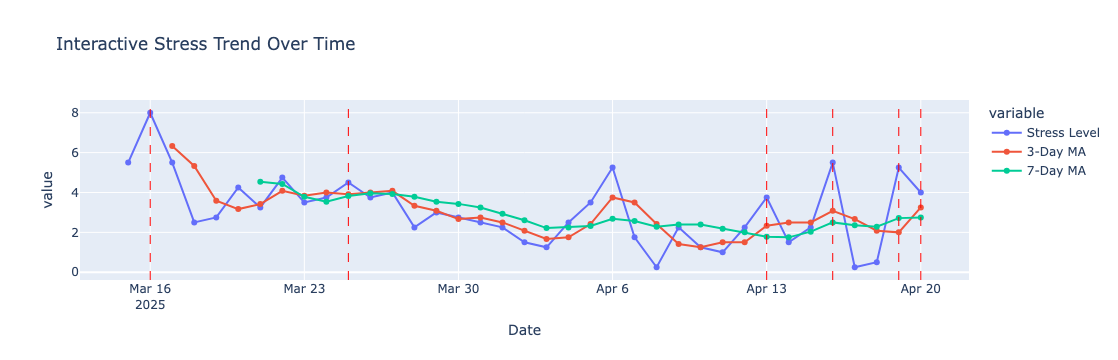

In [95]:
# Interactive Stress Trend Over Time with Plotly Visualization
daily_df = daily_stress.reset_index()
daily_df.columns = ['Date', 'Stress Level']
daily_df['3-Day MA'] = daily_stress_ma3.values
daily_df['7-Day MA'] = daily_stress_ma7.values
daily_df['Exam Day'] = daily_df['Date'].isin(exam_dates)

fig = px.line(daily_df, x='Date', y=['Stress Level', '3-Day MA', '7-Day MA'],
              title='Interactive Stress Trend Over Time', markers=True)

for d in exam_dates:
    fig.add_vline(x=d, line_width=1, line_dash='dash', line_color='red')

fig.show()